<a href="https://colab.research.google.com/github/dansarmiento/ColaboratoryRunningAnalysis/blob/main/FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.0 MB/s 
     |████████████████████████████████| 63 kB 775 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import yfinance as yf 

# microsoft MSFT
msft = yf.Ticker('MSFT')

hist = msft.history(period="max", auto_adjust=True)

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055949,0.064177,0.055949,0.061434,1031788800,0.0,0.0
1986-03-14,0.061434,0.064725,0.061434,0.063628,308160000,0.0,0.0
1986-03-17,0.063628,0.065274,0.063628,0.064725,133171200,0.0,0.0
1986-03-18,0.064725,0.065274,0.062531,0.063079,67766400,0.0,0.0
1986-03-19,0.063079,0.063628,0.061434,0.061982,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2022-03-31,313.899994,315.140015,307.890015,308.309998,33422100,0.0,0.0
2022-04-01,309.369995,310.130005,305.540009,309.420013,27085100,0.0,0.0
2022-04-04,310.089996,315.109985,309.709991,314.970001,24289600,0.0,0.0


In [3]:
import pandas as pd 

df = pd.DataFrame()
df['ds'] = hist.index
df['y'] = hist['Close'].values 

df.tail()

,ds,y
9087,2022-03-31,308.309998
9088,2022-04-01,309.420013
9089,2022-04-04,314.970001
9090,2022-04-05,310.880005
9091,2022-04-06,299.500000


In [4]:
from fbprophet import Prophet 

m = Prophet(daily_seasonality=False)

m.fit(df)

In [6]:
future = m.make_future_dataframe(365, freq='D')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
9450,2023-03-31,297.049805,278.929284,314.934060
9451,2023-04-01,297.410879,277.261394,314.526192
9452,2023-04-02,297.515268,277.138581,314.933798
9453,2023-04-03,297.447515,277.759549,316.739904
9454,2023-04-04,297.573005,278.963626,315.792627
9455,2023-04-05,297.709344,278.628329,315.708991
9456,2023-04-06,297.702551,279.532852,315.535771


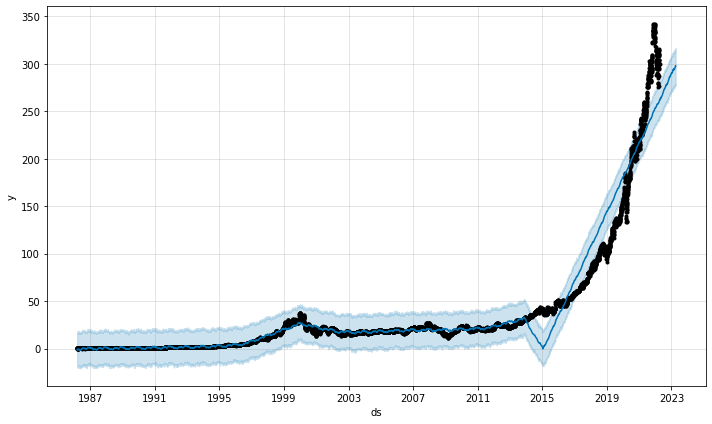

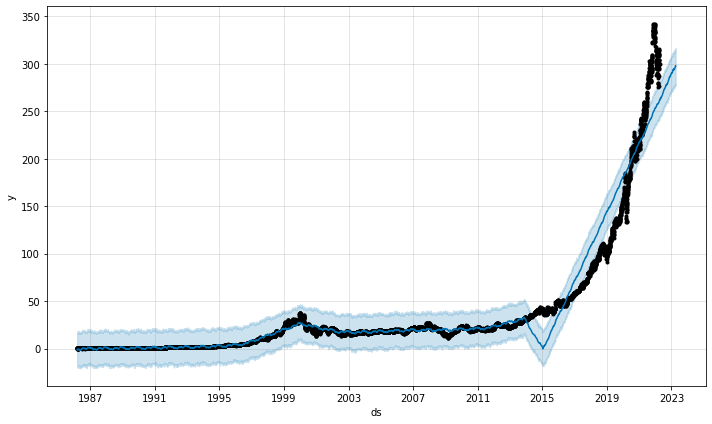

In [7]:
m.plot(forecast)

In [8]:
def make_forecast(ticker, periods, hist='max'):
  """
  forecast the given ticker (stock) period days into the future (from today)

  inputs
  ------
  > ticker 
    >>  ticker of stock to forecast
  > periods
    >>  number of days into the future to forecast
  > hist 
    >> amount of historical data to consider 
        > default : max
        > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
  """
  # pull historical data from yahoo finance
  stock_data = yf.Ticker(ticker) 

  hist_data = stock_data.history(hist, auto_adjust=True)

  # create new dataframe to hold dates (ds) & adjusted closing prices (y)
  df = pd.DataFrame() 

  df['ds'] = hist_data.index.values 
  df['y'] = hist_data['Close'].values 

  # create a Prophet model from that data
  m = Prophet(daily_seasonality=False) 
  m.fit(df)

  future = m.make_future_dataframe(periods, freq='D')

  forecast = m.predict(future)

  m.plot(forecast)

  return forecast

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-03-10,71.561870,58.410636,85.676640,71.561870,71.561870,0.539539,0.539539,0.539539,0.539539,0.539539,0.539539,0.0,0.0,0.0,72.101409
1,2021-03-11,71.640265,58.975760,84.229128,71.640265,71.640265,-0.296753,-0.296753,-0.296753,-0.296753,-0.296753,-0.296753,0.0,0.0,0.0,71.343512
2,2021-03-12,71.718660,59.301285,84.497512,71.718660,71.718660,0.319878,0.319878,0.319878,0.319878,0.319878,0.319878,0.0,0.0,0.0,72.038538
3,2021-03-15,71.953845,59.336678,84.689345,71.953845,71.953845,0.380231,0.380231,0.380231,0.380231,0.380231,0.380231,0.0,0.0,0.0,72.334077
4,2021-03-16,72.032240,61.614697,86.895339,72.032240,72.032240,1.336627,1.336627,1.336627,1.336627,1.336627,1.336627,0.0,0.0,0.0,73.368867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2022-09-29,-64.658881,-89.985225,-40.753121,-85.319111,-43.853407,-0.296753,-0.296753,-0.296753,-0.296753,-0.296753,-0.296753,0.0,0.0,0.0,-64.955634
449,2022-09-30,-65.226694,-88.314085,-39.635859,-86.064281,-44.309164,0.319878,0.319878,0.319878,0.319878,0.319878,0.319878,0.0,0.0,0.0,-64.906815
450,2022-10-01,-65.794506,-91.064040,-43.418712,-86.853263,-44.753900,-1.139761,-1.139761,-1.139761,-1.139761,-1.139761,-1.139761,0.0,0.0,0.0,-66.934267
451,2022-10-02,-66.362319,-93.962969,-41.971688,-87.607462,-45.198637,-1.139761,-1.139761,-1.139761,-1.139761,-1.139761,-1.139761,0.0,0.0,0.0,-67.502080


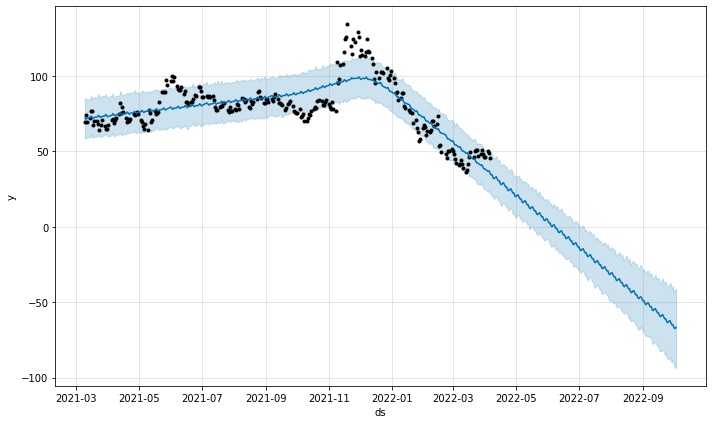

In [9]:
make_forecast('RBLX', 180)